In [1]:
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

In [2]:
#Ejemplo de cálculo de la función Y_4^2
l = 4
m = 2
theta, phi = 0.6, 0.75    # Unos valores cualesquiera de ángulos en radianes
Y42 = sp.sph_harm(m, l, phi, theta)
Y42

(0.02842897832840588+0.40088896207789526j)

In [3]:
z = np.cos(theta)
P42 = sp.lpmv(m,l,z)
P42

9.01048783752695

In [5]:
# f = sci.factorial
# f = lambda n: np.prod( np.array( [i for i in range(1,n)] ) )
def f(num):
    if num < 0: 
        print("Factorial of negative num does not exist")

    elif num == 0: 
        return 1
        
    else: 
        fact = 1
        while(num > 1): 
            fact *= num 
            num -= 1
        return fact 
K_norm = np.sqrt((2*l+1)/(4 * np.pi) * f(l-m)/f(l+m))
K_norm

0.044603102903819275

In [6]:
K_norm * P42* np.exp(m*phi*1j) == Y42

True

In [8]:
def dotprod(f,g):
    #Scipy no integra directamente funciones complejas. Hay que descomponerlas en dos integrales:
    #parte real y parte imaginaria
    integrand_r = lambda theta, phi: np.real(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    integrand_i = lambda theta, phi: np.imag(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    rr = sci.integrate.dblquad(integrand_r, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    ri = sci.integrate.dblquad(integrand_i, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    if np.allclose(rr,0):
        rr = 0
    if np.allclose(ri,0):
        ri=0
    return rr + ri*1j

In [9]:
#Hagamos una primera prueba con dos funciones definidas arbitrariamente:
f = lambda theta, phi: theta * phi
g = lambda theta, phi: np.exp(theta * 1j)
dotprod(f,g)

(-15.503138340149906-48.70454551700121j)

In [11]:
# Comprobamos la ortogonalidad de los armónicos esféricos:
# Si (l,m) =! (l',m') el producto interior es cero
Y = lambda l, m, theta, phi: sp.sph_harm(m, l, phi, theta)
f = lambda theta, phi: Y(4,3,theta, phi) 
g = lambda theta, phi: Y(4,2,theta, phi) 
dotprod(f,g)

0j

In [12]:
# Y si (l,m) = (l',m') el producto interior es uno
f = lambda theta, phi: Y(4,3,theta, phi) 
g = lambda theta, phi: Y(4,3,theta, phi) 
dotprod(f,g)

(1+0j)

In [13]:
l = 4    #grado del armónico esférico
m = 2    # orden
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays de variables angulares
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array de valores absolutos de Ymn
#A continuación convertimos a coordenadas cartesianas
# para su representación 3D
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

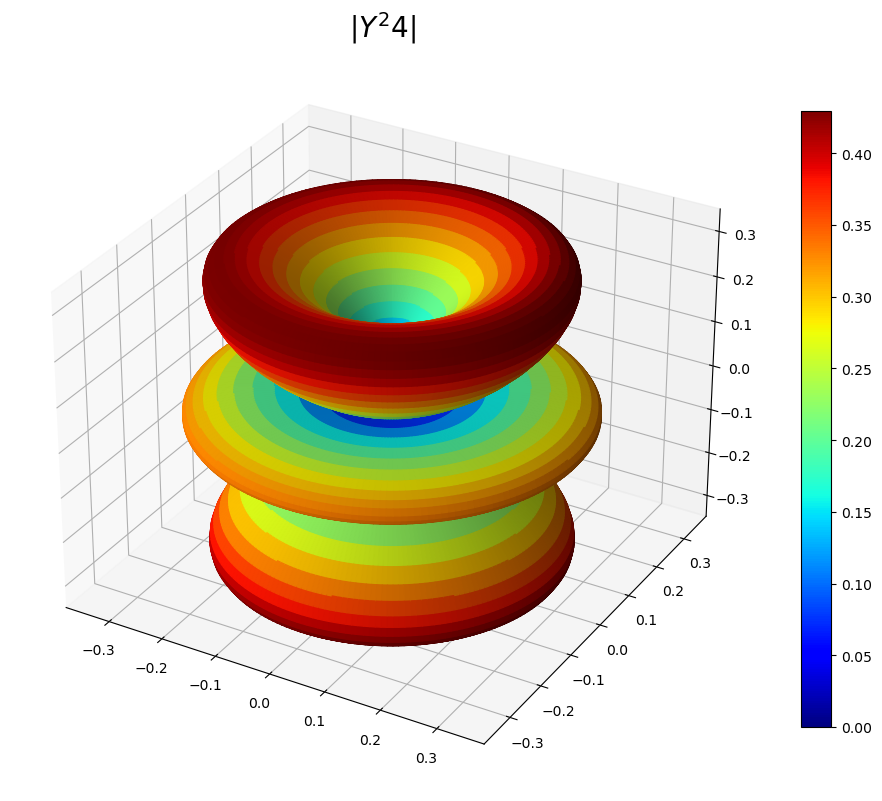

In [16]:
N = R/R.max()    # Normalizar R para que los colores del plot cubran todo el rango del colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12,10))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^2_ 4|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Asignamos al mappable el array de datos sin normalizar,
                  #para que la escala corresponda a los valores de R
fig.colorbar(m, shrink=0.8);

## Parte real

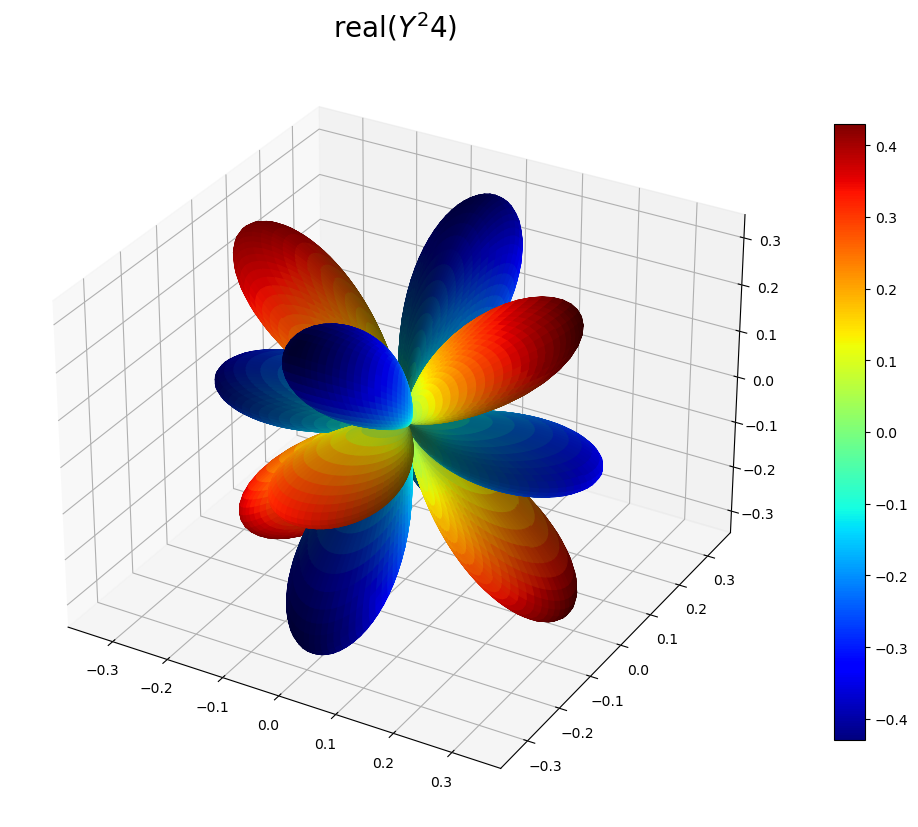

In [17]:
l = 4    #grado del armónico esférico
m = 2    # orden
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#Como R tiene valores negativos, utilizaremos una instancia de Normalize
#según http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 4)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);